In [ ]:
#Chris Cole
#Key to all of the variables

# pclass	Class	 Ordinal	1 = 1st, 2= 2nd, 3 = 3rd 
#survived	 	 Binary (Nominal)	0 = Died, 1 = Survived
#Residence	Country of Residence	 Nominal	0 = American, 1 = British, 2 = Other
#Name		String	
#age	 	 Scale	
#sibsp	Number of siblings/ spouses	 Scale (Discrete)	
#parch	Number of parents/ children on board	 Scale (discrete)	
#Ticket	Ticket number	String	
#fare	Price of ticket	 Scale	
#Cabin	Cabin number	String	
#Embarked	Where passenger embarked	String	
#Boat	Boat identification (if rescued)	String	
#Body	Body number (if died)	ID	
#Home.dest	Home town	tring	
#Gender	Gender	 Binary (Nominal)	0 = Male, 1=Female
#age.group 18+- nominal - 0 = Child under 18, 1 = Adult
#age.group 15+
#travelledAlone did the passenger travel seperate from family


In [3]:
# I created a summary of the age and fare costs
# Of the known ages of the passengers, the average age was around 30 years old and on average the passengers paid $33.29
list.files(path = 'DSC001/Titanic_R.csv')
library(ggplot2)
df = read.table(file = "DSC001/Titanic_R.csv", header = TRUE, sep=",")
summary(df$age)
summary(df$fare)
head(df)

character(0)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.1667 21.0000 28.0000 29.8811 39.0000 80.0000     263 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   7.896  14.454  33.295  31.275 512.329       1 

,pclass,survived,Residence,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Gender,age.group.18.,travelledAlone,age.group.15.
,<int>,<int>,<int>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>
1,3,0,0,"Abbing, Mr. Anthony",42,0,0,C.A. 5547,7.55,,S,,NA,,0,1,1,1
2,3,0,0,"Abbott, Master. Eugene Joseph",13,0,2,C.A. 2673,20.25,,S,,NA,"East Providence, RI",0,0,0,0
3,3,0,0,"Abbott, Mr. Rossmore Edward",16,1,1,C.A. 2673,20.25,,S,,190,"East Providence, RI",0,0,0,1
4,3,1,0,"Abbott, Mrs. Stanton (Rosa Hunt)",35,1,1,C.A. 2673,20.25,,S,A,NA,"East Providence, RI",1,1,0,1
5,3,1,2,"Abelseth, Miss. Karen Marie",16,0,0,348125,7.65,,S,16,NA,"Norway Los Angeles, CA",1,0,1,1
6,3,1,0,"Abelseth, Mr. Olaus Jorgensen",25,0,0,348122,7.65,F G63,S,A,NA,"Perkins County, SD",0,1,1,1


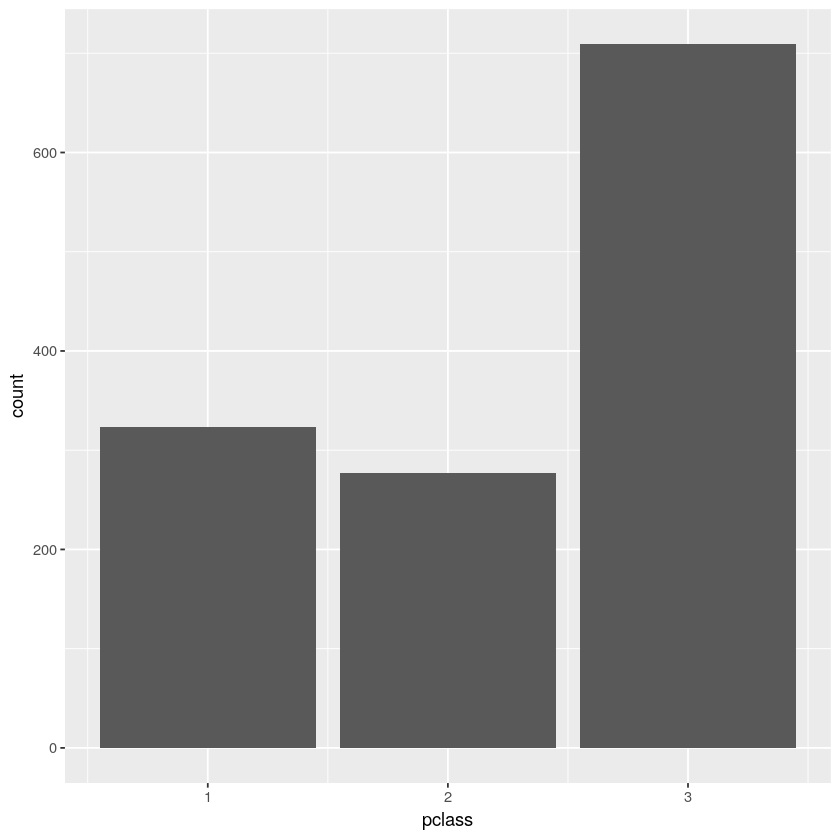

In [29]:
# This histogram shows the frequency of the different classes on the titanic, 3rd class was the most common with over 700 people 
ggplot (df, aes(x = pclass)) + geom_bar()

In [5]:
# I will first examine how age and gender affected survival chances through logistic regression
# By using the summary function, this logistic regression shows that if you were a female, you were 10.538 times (e^2.355)the odds of survival for males
# The age group category tells us that if you are an adult you had 1.037 times (e^.0137) the odds of survival than if you were a minor
# By using a alpha level of .05 we are unable to determine whether age group played a significant role in survival 
exp(.0137)
logit = glm(formula = df$survived ~ df$Gender + df$age.group.18. + age + df$age.group.15. + df$travelledAlone, family = "binomial", data= df) 
summary(logit)

[1] 1.013794


Call:
glm(formula = df$survived ~ df$Gender + df$age.group.18. + age + 
    df$age.group.15. + df$travelledAlone, family = "binomial", 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9183  -0.6477  -0.6386   0.8024   1.9969  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -0.7655776  0.2386482  -3.208  0.00134 ** 
df$Gender          2.4202250  0.1578167  15.336  < 2e-16 ***
df$age.group.18.   0.3557469  0.3032115   1.173  0.24069    
age                0.0008514  0.0069165   0.123  0.90203    
df$age.group.15.  -0.8228772  0.3697096  -2.226  0.02603 *  
df$travelledAlone -0.2724891  0.1648281  -1.653  0.09830 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1414.6  on 1045  degrees of freedom
Residual deviance: 1090.8  on 1040  degrees of freedom
  (263 observations deleted due to missingness)
AIC: 110

In [2]:
#In this contingency table the horizontal numbers represent gender with 1 being female and the vertical numbers are whether or no they survived
# The table below shows that 72% of the 466 females on the ship survived and nearly 81% of the males died supporting the idea that they prioritized getting women of the ship first
table(df$survived,df$Gender)
prop.table(table(df$survived,df$Gender), margin = 2)*100

   
      0   1
  0 682 127
  1 161 339

   
           0        1
  0 80.90154 27.25322
  1 19.09846 72.74678

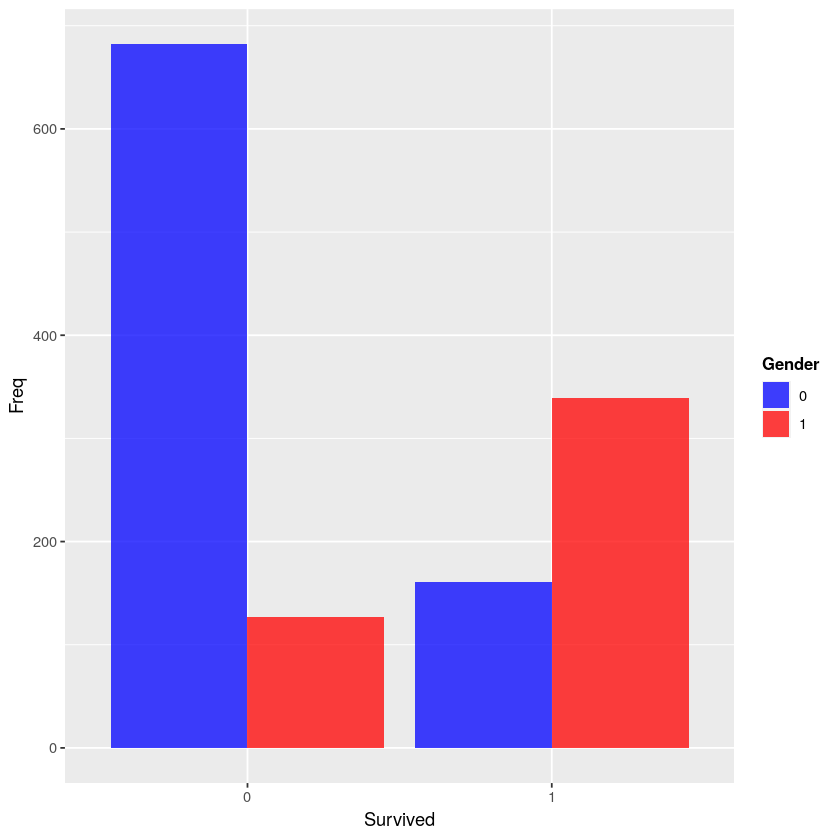

In [60]:
#This is a graph of the contingency table above displaying the 
results = data.frame(table(df$survived,df$Gender))
names(results)[1]='Survived'
names(results)[2]='Gender'
ggplot(data = results, aes(x = Survived, y = Freq, fill = Gender)) +
  geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)+ theme(plot.title = element_text(hjust = 0.5), 
        legend.title = element_text(face="bold", size = 10)) + scale_fill_manual(values=c("Blue",
                             "red",
                             "blue",
                             "red"))

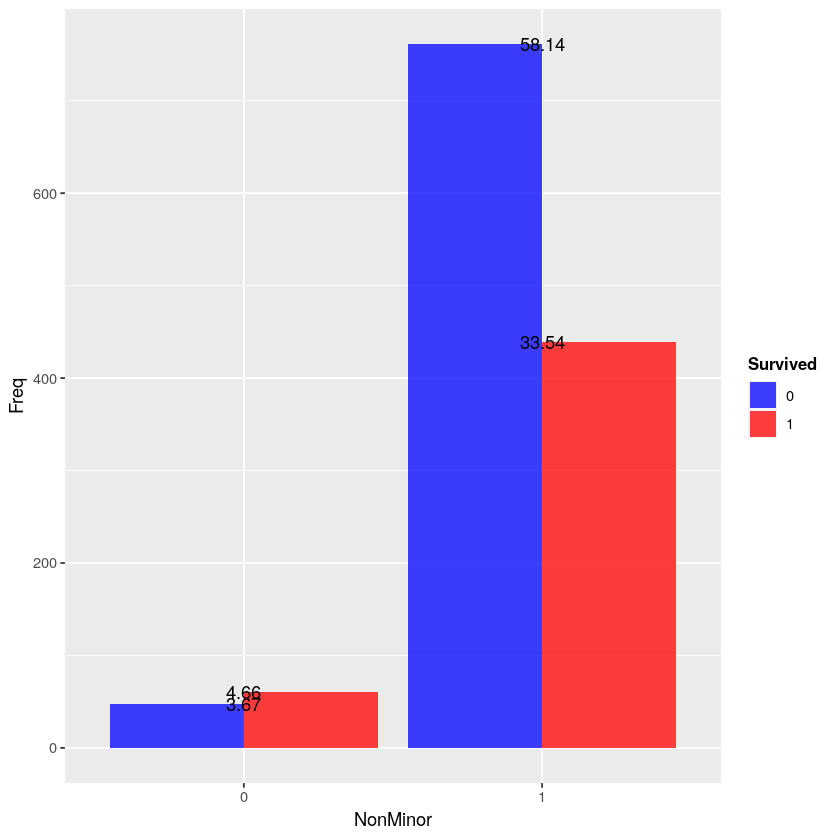

In [13]:
results = data.frame(table(df$survived,df$age.group.15.))
names(results)[1]='Survived'
names(results)[2]='NonMinor'
percent = round(results$Freq/1309*100, digits = 2)
ggplot(data = results, aes(x = NonMinor, y = Freq, fill = Survived)) +
  geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)+ theme(plot.title = element_text(hjust = 0.5), 
        legend.title = element_text(face="bold", size = 10)) + geom_text(aes(label = (percent))) + scale_fill_manual(values=c("Blue",
                             "red",
                             "blue",
                             "red"))

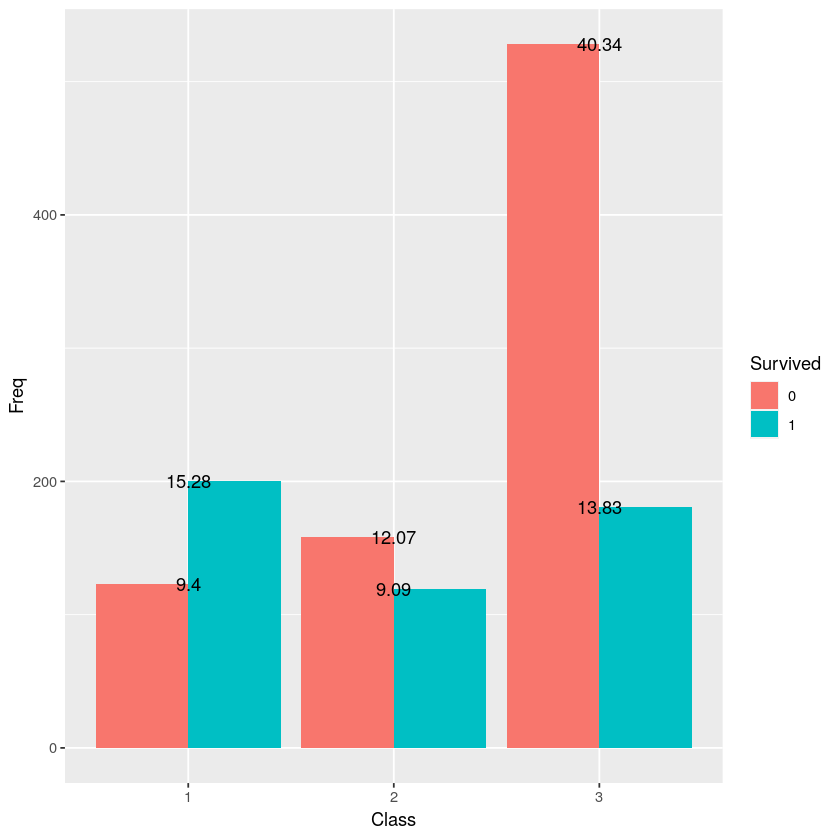

In [64]:
#This graph shows that the vast majority of the casualties were third class passengers only approximately 13.83% of the passengers who were on the ship were 3rd class survivors even though they make up the largest share
# First class passengers were more likely to survive and made up the majority of the survivors
results = data.frame(table(df$survived,df$pclass))
names(results)[1]='Survived'
names(results)[2]='Class'
percent = round(results$Freq/1309*100, digits = 2)
ggplot(data = results, aes(x = Class, y = Freq, fill = Survived)) + geom_bar(stat = "identity", position = position_dodge())  + geom_text(aes(label = (percent)))

In [ ]:
# Through my analysis of the data, I was able to get a better picture of how the titanic was being evacutated as the ship was sinking
# I want to further observe  what country of residence were most of the survivors from so that I can learn which groups were most likely to be in each class
# I also wanted to see whether there is any correlation with any of the variables and fare cost 